In [ ]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline


Preparing Data

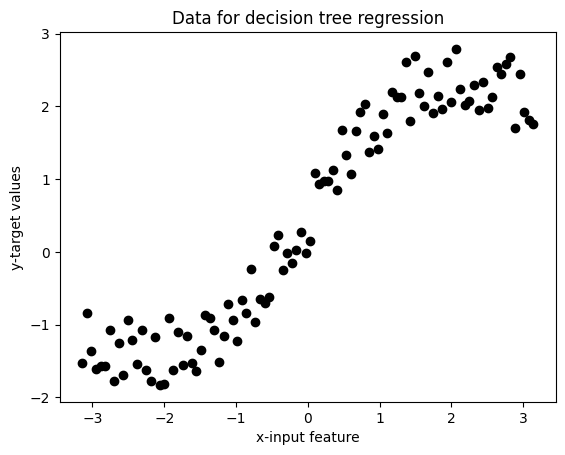

In [ ]:
number_of_samples = 100
x=np.linspace(-np.pi,np.pi,number_of_samples)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x,y,color= 'black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Data for decision tree regression')
plt.show()


Split data into training, validation and test sets

In [ ]:
random_indices = np.random.permutation(number_of_samples)
#Training Set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation Set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test Set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]


Fit a line to data


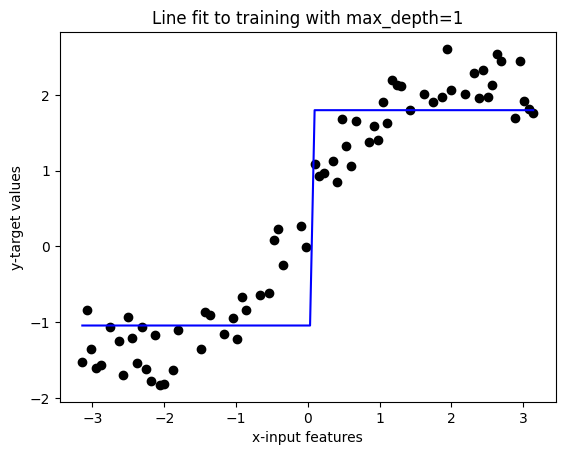

Training MSE: 0.2717987738609489
Validation MSE: 0.4664751631146759
Testing MSE: 0.3857389742655891


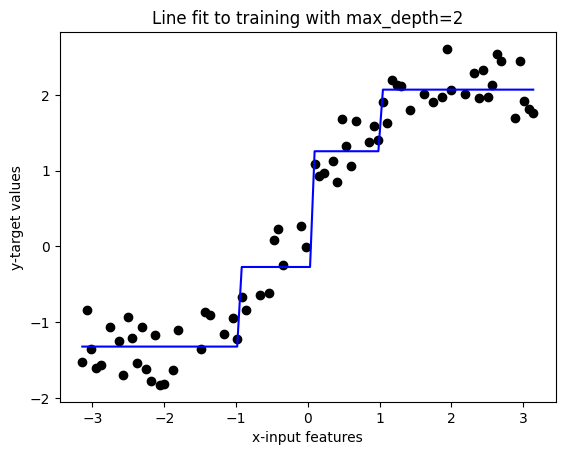

Training MSE: 0.09201532589564872
Validation MSE: 0.11745674221213923
Testing MSE: 0.2368973344952861


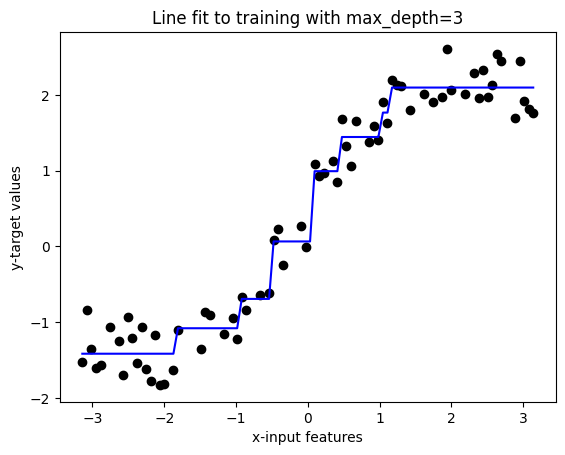

Training MSE: 0.05430740392800371
Validation MSE: 0.11623316922320841
Testing MSE: 0.16707314894024977


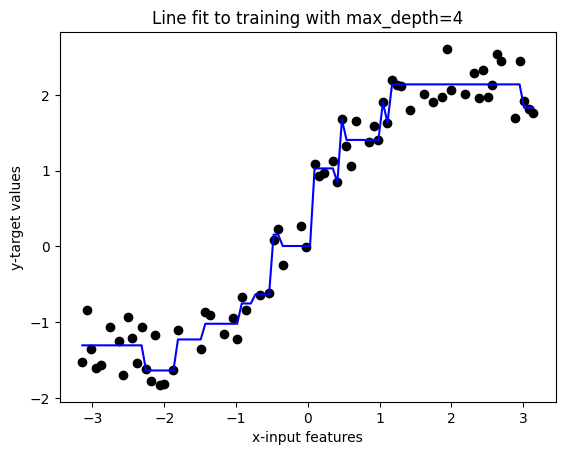

Training MSE: 0.04127325361407537
Validation MSE: 0.12503673320882122
Testing MSE: 0.1549896091529887


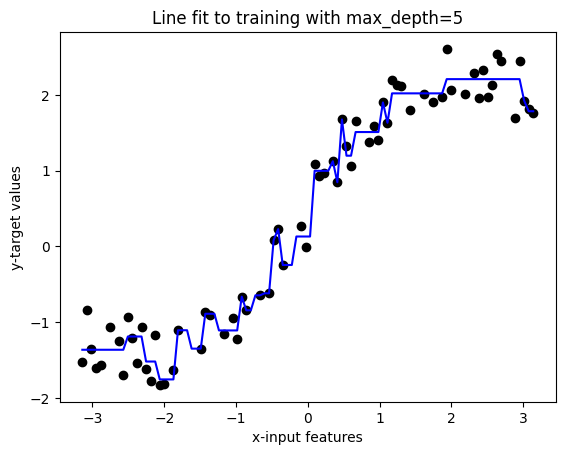

Training MSE: 0.03149363495171939
Validation MSE: 0.16139215868008455
Testing MSE: 0.1291886953783234


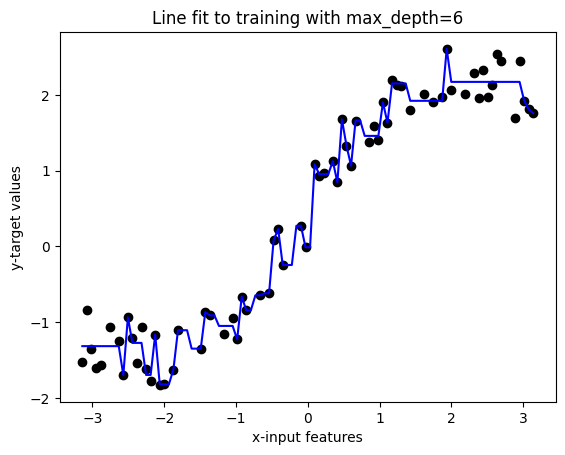

Training MSE: 0.01965631835276238
Validation MSE: 0.1749459854976075
Testing MSE: 0.14807988758889581


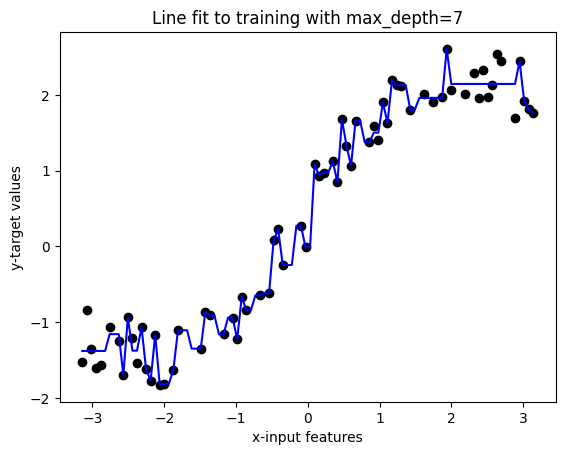

Training MSE: 0.015605776408351568
Validation MSE: 0.19807503866634887
Testing MSE: 0.1451516275004067


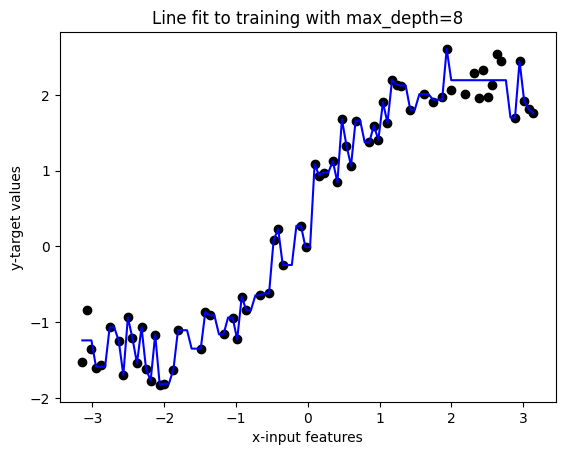

Training MSE: 0.009091329033344437
Validation MSE: 0.20361224177209325
Testing MSE: 0.17974149024131675


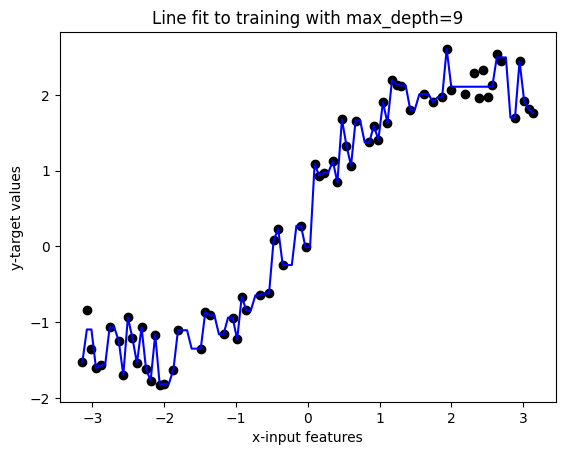

Training MSE: 0.003952594420641786
Validation MSE: 0.20462145184687838
Testing MSE: 0.17554983902334564


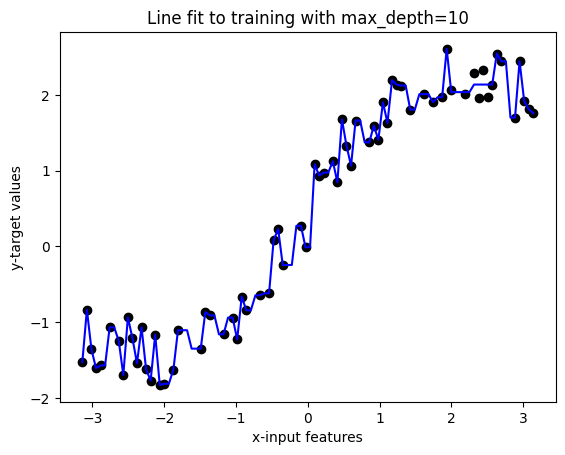

Training MSE: 0.001731795199456686
Validation MSE: 0.20623517737774982
Testing MSE: 0.18325537772963285


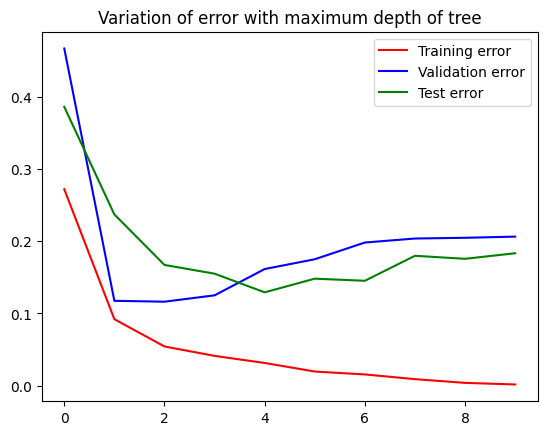

In [16]:
maximum_depth_of_tree= np.arange(10) + 1
train_err_arr= []
val_err_arr= []
test_err_arr= []

for depth in maximum_depth_of_tree:
  model= tree.DecisionTreeRegressor(max_depth=depth)

  #sklearn takes inputs as matrices. hence we reshape the arrays into column mtrices
  x_train_for_line_fitting = np.asarray(x_train.reshape(len(x_train),1))
  y_train_for_line_fitting = np.asarray(y_train.reshape(len(x_train),1))

  #Fit the line to training data
  model.fit(x_train_for_line_fitting,y_train_for_line_fitting)

  #plot the line
  plt.figure()
  plt.scatter(x_train,y_train,color='black')
  plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
  plt.xlabel('x-input features')
  plt.ylabel('y-target values')
  plt.title('Line fit to training with max_depth='+ str(depth))
  plt.show()

  mean_train_error= np.mean((y_train- model.predict(x_train.reshape(len(x_train),1)))**2)
  mean_val_error= np.mean((y_val- model.predict(x_val.reshape(len(x_val),1)))**2)
  mean_test_error= np.mean((y_test- model.predict(x_test.reshape(len(x_test),1)))**2)

  train_err_arr.append(mean_train_error)
  val_err_arr.append(mean_val_error)
  test_err_arr.append(mean_test_error)

  print('Training MSE:' ,mean_train_error)
  print('Validation MSE:', mean_val_error)
  print('Testing MSE:' , mean_test_error)

plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()



